In [2]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import KFold, train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder

In [1]:
# Download cleaned data from project github
url_application = "https://raw.githubusercontent.com/manish-cr/CS3244-credit-approval/master/data/application_cleaned.csv"

# Download the 2 & 3 labelled data from project github
test_data_2label_url = "https://raw.githubusercontent.com/manish-cr/CS3244-credit-approval/master/data/credit_cleaned_test_twolabels.csv"
test_data_3label_url = "https://raw.githubusercontent.com/manish-cr/CS3244-credit-approval/master/data/credit_cleaned_test_threelabels.csv"

train_data_2label_url = "https://raw.githubusercontent.com/manish-cr/CS3244-credit-approval/master/data/credit_cleaned_training_twolabels.csv"
train_data_3label_url = "https://raw.githubusercontent.com/manish-cr/CS3244-credit-approval/master/data/credit_cleaned_training_threelabels.csv"

In [3]:
# Train + Test data labels (2 label and 3 label versions)
train_data_2label = pd.read_csv(train_data_2label_url)
train_data_3label = pd.read_csv(train_data_3label_url)

test_data_2label = pd.read_csv(test_data_2label_url)
test_data_3label = pd.read_csv(test_data_3label_url)

# Cleaned data
application_df = pd.read_csv(url_application)

In [4]:
# Only the Label column is needed, ID is used as the key when merging the datasets
credit_train_2label = train_data_2label[['ID', 'Credit_Status']]
credit_train_3label = train_data_3label[['ID', 'Credit_Status']]

credit_test_2label = test_data_2label[['ID', 'Credit_Status']]
credit_test_3label = test_data_3label[['ID', 'Credit_Status']]

In [5]:
# Merging application and credit csv based on ID
train_2label_df = pd.merge(application_df, credit_train_2label, how="inner", on="ID").loc[:,'ID':]
test_2label_df = pd.merge(application_df, credit_test_2label, how="inner", on="ID").loc[:,'ID':]

train_3label_df = pd.merge(application_df, credit_train_3label, how="inner", on="ID").loc[:,'ID':]
test_3label_df = pd.merge(application_df, credit_test_3label, how="inner", on="ID").loc[:,'ID':]

In [6]:
# need to fix these dtype from int64 to categorical
columns_to_convert = ['FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL']

# Convert the data type of the specified columns to object
train_2label_df[columns_to_convert] = train_2label_df[columns_to_convert].astype('object')
train_3label_df[columns_to_convert] = train_3label_df[columns_to_convert].astype('object')

test_2label_df[columns_to_convert] = test_2label_df[columns_to_convert].astype('object')
test_3label_df[columns_to_convert] = test_3label_df[columns_to_convert].astype('object')

In [7]:
# Separating the data into X and y
X_train_2label = train_2label_df.loc[:, "CODE_GENDER":"CNT_FAM_MEMBERS"]
y_train_2label = train_2label_df["Credit_Status"]

X_train_3label = train_3label_df.loc[:, "CODE_GENDER":"CNT_FAM_MEMBERS"]
y_train_3label = train_3label_df["Credit_Status"]

X_test_2label = test_2label_df.loc[:, "CODE_GENDER":"CNT_FAM_MEMBERS"]
y_test_2label = test_2label_df["Credit_Status"]

X_test_3label = test_3label_df.loc[:, "CODE_GENDER":"CNT_FAM_MEMBERS"]
y_test_3label = test_3label_df["Credit_Status"]

In [9]:
# Identifying the columns that are of type int64 and float64 (for train)
numeric_col = []
for names in X_train_2label.columns:
  if X_train_2label[names].dtypes in ['int64', 'float64']:
    numeric_col.append(names)

# Standardising the columns of type int64 and float64
features = X_train_2label[numeric_col]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
X_train_2label[numeric_col] = features

features = X_train_3label[numeric_col]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
X_train_3label[numeric_col] = features

# for test
features = X_test_2label[numeric_col]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
X_test_2label[numeric_col] = features

features = X_test_3label[numeric_col]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
X_test_3label[numeric_col] = features

In [10]:
# Identifying the columns that are of type object
categorical_col = []
for names in X_train_2label.columns:
  if X_train_2label[names].dtypes in ['object']:
    categorical_col.append(names)

## One Hot Encoding the categorical columns (train)
# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

# Fit and transform the specified columns
encoded_columns = encoder.fit_transform(X_train_2label[categorical_col])

# Create a DataFrame from the one-hot encoded columns
encoded_df = pd.DataFrame(encoded_columns, columns=encoder.get_feature_names_out(categorical_col))

# Concatenate the one-hot encoded DataFrame with the original DataFrame
X_train_2label = pd.concat([X_train_2label, encoded_df], axis=1)
X_train_3label = pd.concat([X_train_3label, encoded_df], axis=1)

# Drop the original categorical columns if needed
X_train_2label = X_train_2label.drop(categorical_col, axis=1)
X_train_3label = X_train_3label.drop(categorical_col, axis=1)

C:\Users\Manish Seal\AppData\Roaming\Python\Python311\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [11]:
## One Hot Encoding the categorical columns (test)
# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

# Fit and transform the specified columns
encoded_columns = encoder.fit_transform(X_test_2label[categorical_col])

# Create a DataFrame from the one-hot encoded columns
encoded_df = pd.DataFrame(encoded_columns, columns=encoder.get_feature_names_out(categorical_col))

# Concatenate the one-hot encoded DataFrame with the original DataFrame
X_test_2label = pd.concat([X_test_2label, encoded_df], axis=1)
X_test_3label = pd.concat([X_test_3label, encoded_df], axis=1)

# Drop the original categorical columns if needed
X_test_2label = X_test_2label.drop(categorical_col, axis=1)
X_test_3label = X_test_3label.drop(categorical_col, axis=1)

C:\Users\Manish Seal\AppData\Roaming\Python\Python311\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


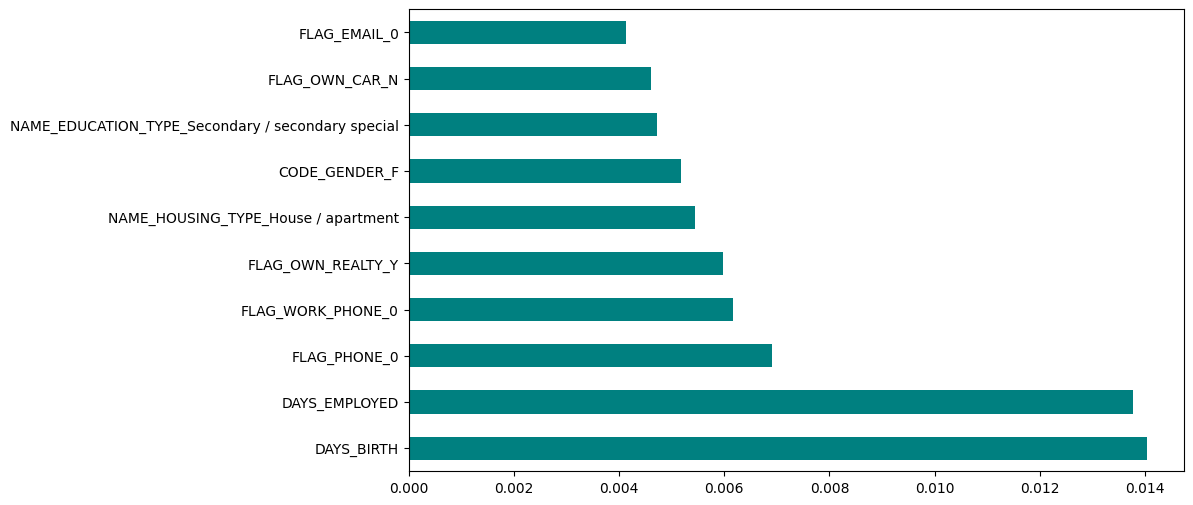

In [12]:
# Feature Selection by Filter method
# Information Gain
importances = mutual_info_classif(X_train_2label, y_train_2label)
feat_importances = pd.Series(importances, X_train_2label.columns)

# Select the top 10 features
top_10_feats = feat_importances.nlargest(10)

plt.figure(figsize=(10, 6))
top_10_feats.plot(kind='barh', color='teal')
plt.show()

In [13]:
# From here, we will use the top 10 features for the Neural Network Model
top_10 = top_10_feats.index.to_list()
print(top_10)

['DAYS_BIRTH', 'DAYS_EMPLOYED', 'FLAG_PHONE_0', 'FLAG_WORK_PHONE_0', 'FLAG_OWN_REALTY_Y', 'NAME_HOUSING_TYPE_House / apartment', 'CODE_GENDER_F', 'NAME_EDUCATION_TYPE_Secondary / secondary special', 'FLAG_OWN_CAR_N', 'FLAG_EMAIL_0']


In [14]:
data_list = [
    X_train_2label,
    y_train_2label,
    X_test_2label,
    y_test_2label,
    X_train_3label,
    y_train_3label,
    X_test_3label,
    y_test_3label
]

import pickle
data_list_filepath = "../data/my_pickled_data.pkl"
with open(data_list_filepath,"wb") as file:
    pickle.dump(data_list,file)